In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
boston_df = pd.read_csv("boston.csv")

In [ ]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
x = boston_df.iloc[0:,:-1]

In [ ]:
y = boston_df.iloc[:,-1]

In [ ]:
linear_model = LinearRegression()

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42,test_size = 0.3)

In [ ]:
linear_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_predict=linear_model.predict(x_test)

<AxesSubplot:xlabel='MEDV'>

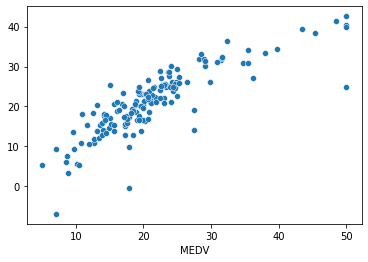

In [ ]:
sns.scatterplot(x=y_test,y = y_predict)

In [ ]:
mean_squared_error = np.mean((y_predict-y_test)**2)

In [ ]:
mean_squared_error

21.517444231177183

In [ ]:
linear_model_coefficient = pd.DataFrame()

In [ ]:
linear_model_coefficient["columns"]=x_train.columns 

In [ ]:
linear_model_coefficient["coefficient"]=pd.Series(linear_model.coef_)

In [ ]:
linear_model_coefficient 

,columns,coefficient
0,CRIM,-0.133470
1,ZN,0.035809
2,INDUS,0.049523
3,CHAS,3.119835
4,NOX,-15.417061
5,RM,4.057199
6,AGE,-0.010821
7,DIS,-1.385998
8,RAD,0.242727
9,TAX,-0.008702


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly_features = PolynomialFeatures(degree=2)

In [ ]:
x_train_poly = poly_features.fit_transform(x_train)

In [ ]:
poly_model = LinearRegression()

In [ ]:
poly_model.fit(x_train_poly,y_train)

LinearRegression()

In [ ]:
poly_coefficient = pd.DataFrame()

In [ ]:
poly_coefficient["columns"]=x_train.columns

In [ ]:
poly_coefficient["coefficient"]=pd.Series(poly_model.coef_)

In [ ]:
poly_coefficient

,columns,coefficient
0,CRIM,2.790022e+09
1,ZN,-8.871163e+00
2,INDUS,2.914205e-01
3,CHAS,-5.239687e+00
4,NOX,3.248148e+01
5,RM,3.102691e+02
6,AGE,1.407439e+01
7,DIS,6.982287e-01
8,RAD,2.820233e+00
9,TAX,3.837577e-01


In [ ]:
y_predict_poly = poly_model.predict(poly_features.fit_transform(x_test)) 

In [ ]:
mean_squared_error_poly = np.mean((y_predict_poly-y_test)**2)

In [ ]:
mean_squared_error_poly

29.806887679747536

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge_model = Ridge(alpha=1)

In [ ]:
ridge_coefficent = pd.DataFrame()

In [ ]:
ridge_model.fit(x_train,y_train)

Ridge(alpha=1)

In [ ]:
ridge_coefficent["columns"] = x_train.columns

In [ ]:
ridge_coefficent["coefficent"] = pd.Series(ridge_model.coef_)

In [ ]:
ridge_coefficent

,columns,coefficent
0,CRIM,-0.128427
1,ZN,0.036952
2,INDUS,0.017914
3,CHAS,2.932695
4,NOX,-7.848060
5,RM,4.063574
6,AGE,-0.017242
7,DIS,-1.271761
8,RAD,0.225494
9,TAX,-0.009381


In [ ]:
y_predict_ridge = ridge_model.predict(x_test)

In [ ]:
mean_squared_error_ridge = np.mean((y_predict_ridge-y_test)**2)

In [ ]:
mean_squared_error_ridge

22.044053089861013